# Lecture 5, 10.11.2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from math import *
from scipy.integrate import odeint

In [2]:
# Interactive Widgets
import ipywidgets as widgets
from IPython.display import HTML
from ipywidgets import interact, IntSlider, FloatSlider, Layout

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

## FritzhughNagumo-Model

In [3]:
def nagumo(x, t, a, b, e, I):
    #x[0] is u         - membrane voltage
    #x[1] is w         - recovery variable 
    # dx1dt is u_dot  - change of membrane voltage over time
    # dx2dt is w_dot  - change of recovery
    
    #t is time
    #a is a
    #b is b           - threshold value
    #e is epsilon
    #I is I            - external injection current
    
    dx1dt = a*x[0]*(x[0]-b)*(1-x[0])-x[1]+I
    dx2dt = e*(x[0]-x[1])
    #print(dx2dt)
    return [dx1dt, dx2dt]

In [4]:
def plot_nullclines(a, b, I, e):
    # u nullcline
    u = np.linspace(-1, 2, 100)
    w = a*u*(u-b)*(1-u)+I
    plt.plot(u, w)
    # w nullcline
    w = np.linspace(-1, 1)
    u = w
    plt.plot(u, w)
    
#plot_nullclines (a,b,I,e)
    

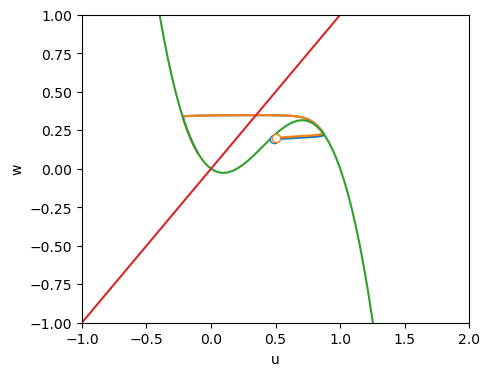

In [5]:
%matplotlib inline    
    
nagumo_fig = plt.figure(figsize=(5,4))
    
plt.xlim(-1, 2)
plt.ylim(-1, 1)
plt.xlabel('u')
plt.ylabel('w')
a=3 
b=0.2 
I=0 
e=0.01
u0=0+0.49
w0=0+0.19
Tmax=100
x0 = [0 + u0 ,0 + w0]

#
u0_1=0+0.5
w0_1=0+0.2
x0_1 = [0 + u0_1 ,0 + w0_1]

ts = np.linspace(0,Tmax,round(Tmax*10))

traj = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0, ts)
lh = plt.plot(traj[:,0], traj[:,1])

traj_1 = odeint(lambda x, t: nagumo(x,t,a,b,e,I), x0_1, ts)
lh_1 = plt.plot(traj_1[:,0], traj_1[:,1])


plt.figure(nagumo_fig)
plot_nullclines (a,b,I,e)
plt.plot(*x0, 'bo', markeredgecolor = lh[0].get_color(), markerfacecolor = 'w') #starting point x0
plt.plot(*x0_1, 'bo', markeredgecolor = lh_1[0].get_color(), markerfacecolor = 'w') #starting point x0


    

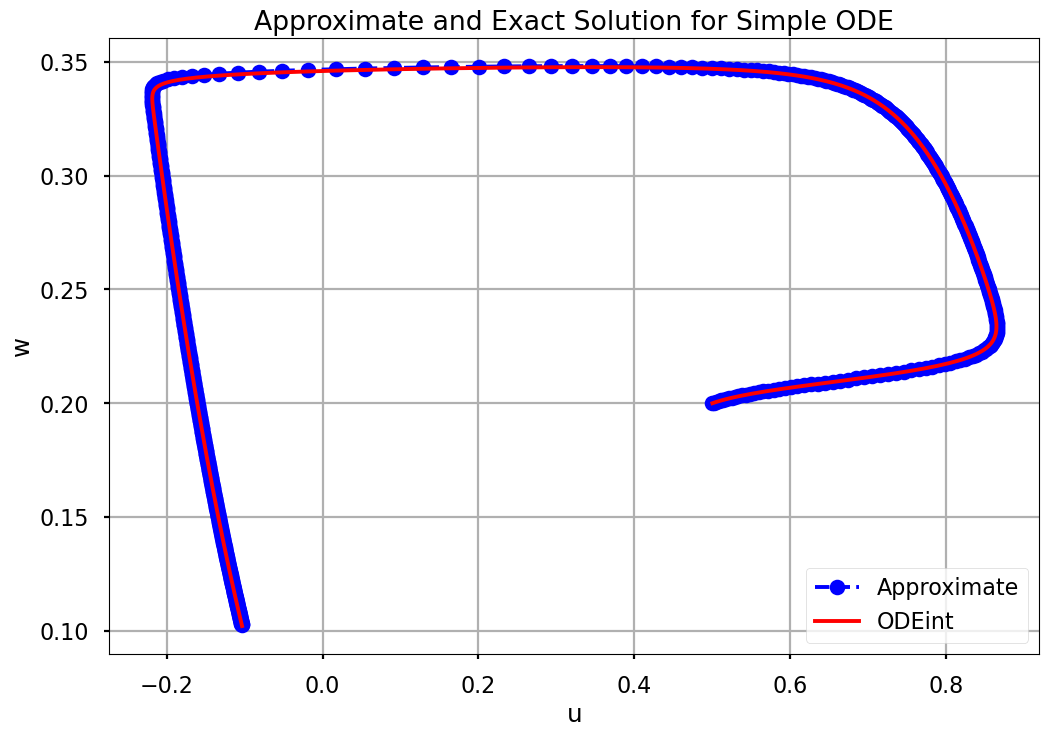

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
#f = lambda t, s: np.exp(-t) # ODE
f= lambda t,x: np.array(nagumo(x,t,a,b,e,I))



h = 0.1 # Step size
t = np.arange(0, 100 + h, h) # Numerical grid
s0 = [u0_1,w0_1] # Initial Condition

# Explicit Euler Method

s = np.zeros((len(t),2))

s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

    
plt.figure(figsize = (12, 8))

plt.plot(s[:,0], s[:,1], 'bo--', label='Approximate')

plt.plot(traj_1[:,0],traj_1[:,1], 'r', label='ODEint')
plt.title('Own ODE integration vs ODEint')
plt.xlabel('u')
plt.ylabel('w')
plt.grid()
plt.legend(loc='lower right')
plt.show()